<a href="https://www.kaggle.com/code/pologonz/linearregression?scriptVersionId=96294876" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Dependency imports

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness-report-2015-to-2022/world-happiness-report-2015-2022-cleaned.csv


## Load dataset and view table head

In [2]:
df = pd.read_csv('/kaggle/input/world-happiness-report-2015-to-2022/world-happiness-report-2015-2022-cleaned.csv',skipfooter=146,decimal='.')
df.head()

/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,Unnamed: 0,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,0,1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,1,2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,2,3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,3,4,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,4,5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [3]:
df.describe()

,Unnamed: 0,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
count,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000
mean,77.007387,78.003693,5.412204,0.916687,1.050359,0.611036,0.430679,0.127517,0.208905,2017.968606
std,44.752347,44.752183,1.118346,0.401499,0.332085,0.248725,0.152705,0.108029,0.117427,1.996516
min,0.000000,1.000000,2.523000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,38.000000,39.000000,4.571000,0.612965,0.835440,0.436392,0.331000,0.055000,0.122265,2016.000000
50%,77.000000,78.000000,5.384300,0.982019,1.082680,0.643680,0.449000,0.093000,0.196000,2018.000000
75%,116.000000,117.000000,6.207250,1.237500,1.310832,0.799645,0.552420,0.160825,0.265955,2020.000000
max,157.000000,158.000000,7.842000,1.870766,1.644000,1.141000,0.724000,0.551910,0.838075,2021.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083 entries, 0 to 1082
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     1083 non-null   int64  
 1   Happiness Rank                 1083 non-null   int64  
 2   Country                        1083 non-null   object 
 3   Region                         1083 non-null   object 
 4   Happiness Score                1083 non-null   float64
 5   Economy (GDP per Capita)       1083 non-null   float64
 6   Family (Social Support)        1083 non-null   float64
 7   Health (Life Expectancy)       1083 non-null   float64
 8   Freedom                        1083 non-null   float64
 9   Trust (Government Corruption)  1083 non-null   float64
 10  Generosity                     1083 non-null   float64
 11  Year                           1083 non-null   int64  
dtypes: float64(7), int64(3), object(2)
memory usage:

## Hypothesis 1: happines is correlated to GDP per capita
### Visualize data

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

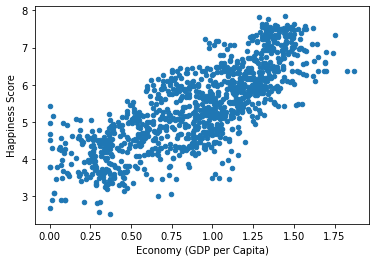

In [5]:
df.plot.scatter('Economy (GDP per Capita)','Happiness Score')

### Split data into train and test sets

In [6]:
X = df['Economy (GDP per Capita)'].values.reshape(-1, 1)
y = df['Happiness Score'].values
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.8)

### Create, fit model and make predictions

In [7]:
model = LinearRegression().fit(x_train, y_train)
y_predict = model.predict(x_test)
print(f"Train accuracy {round(model.score(x_train,y_train)*100,0)} %")
print(f"Test accuracy {round(model.score(x_test,y_test)*100,0)} %")

Train accuracy 59.0 %
Test accuracy 70.0 %


#### Model construction is solid because accuracy for the train and test sets is similiar.
### Separately, despite relatively low accuracy, the correlation between happiness and GDP per capita is clearly visible

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

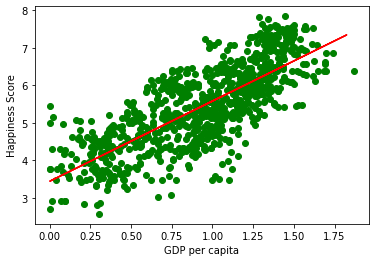

In [8]:
plt.scatter(x_train,y_train,color='green')
plt.plot(x_test,y_predict,color='red')
plt.xlabel("GDP per capita")
plt.ylabel("Happiness Score")
plt.plot

## Hypothesis 2: happines is correlated to Family / Social Support, but this correlation is not as strong as GDP per capita

<AxesSubplot:xlabel='Family (Social Support)', ylabel='Happiness Score'>

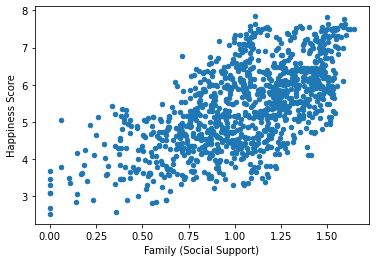

In [9]:
df.plot.scatter('Family (Social Support)','Happiness Score')

### Split the data, create and fit model, make predictions

In [10]:
X = df['Family (Social Support)'].values.reshape(-1, 1)
y = df['Happiness Score'].values
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.8)
model = LinearRegression().fit(x_train, y_train)
y_predict = model.predict(x_test)
print(f"Train accuracy {round(model.score(x_train,y_train)*100,0)} %")
print(f"Test accuracy {round(model.score(x_test,y_test)*100,0)} %")

Train accuracy 39.0 %
Test accuracy 42.0 %


#### Model construction is solid because accuracy for the train and test sets is similiar.
### Despite relatively low accuracy for a linear regression, the correlation between Family/Social Support is visible, but not as strong as GDP per capita

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

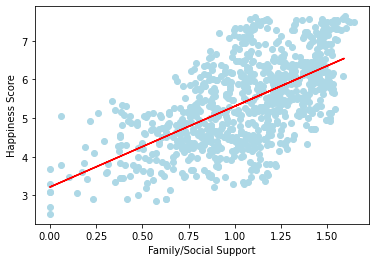

In [11]:
plt.scatter(x_train,y_train,color='lightblue')
plt.plot(x_test,y_predict,color='red')
plt.xlabel("Family/Social Support")
plt.ylabel("Happiness Score")
plt.plot

### As can be expected, there is also a significant correlation between GDP per capita and Health / Life expectancy

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Health (Life Expectancy)'>

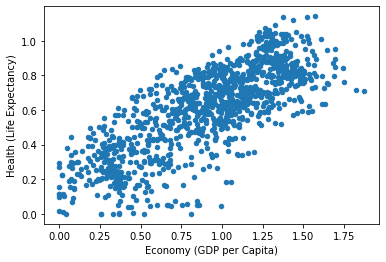

In [12]:
df.plot.scatter('Economy (GDP per Capita)','Health (Life Expectancy)')

### But, a more muted correlation between GDP per capita and Trust / Government corruption
#### For the most part, wealthier countries trust their governments more than non-wealthy countries

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Trust (Government Corruption)'>

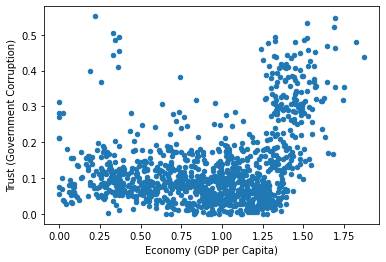

In [13]:
df.plot.scatter('Economy (GDP per Capita)','Trust (Government Corruption)')

### However, there is a weak correlation between GDP per capita and Freedom

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Freedom'>

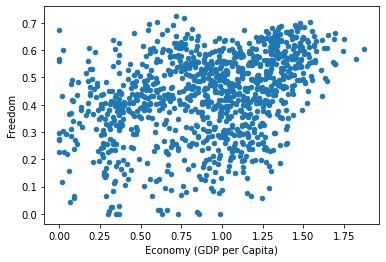

In [14]:
df.plot.scatter('Economy (GDP per Capita)','Freedom')

### And essentially no correlation between GDP per capital and Generosity!

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Generosity'>

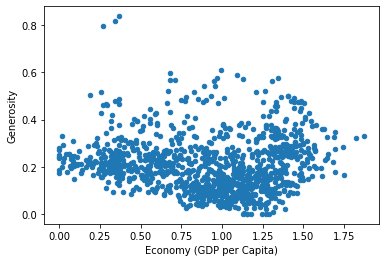

In [15]:
df.plot.scatter('Economy (GDP per Capita)','Generosity')